In [6]:
%matplotlib inline

from ypack import th_utils
import torch as th
import numpy as np
from sklearn import metrics
from matplotlib import pyplot as plt

100%|██████████| 1/1 [00:00<00:00, 112.37it/s]


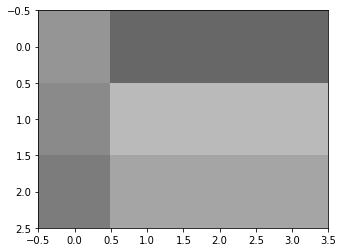

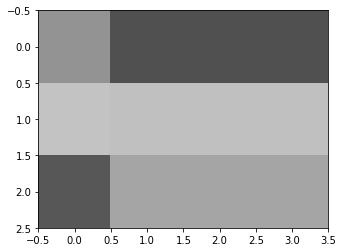

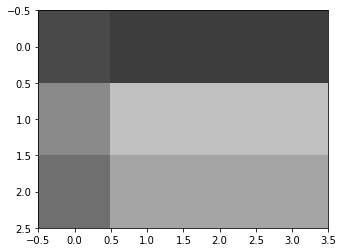

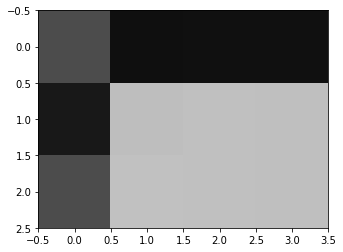

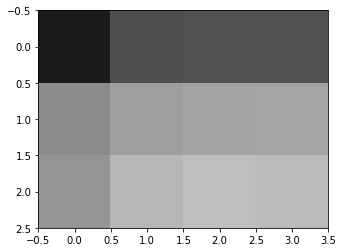

In [12]:
net = th.nn.Sequential(
            th.nn.Linear(20, 30),
            th.nn.ReLU(),
            th.nn.Linear(30, 10)
        )
x0 = th.zeros(20).unsqueeze_(0)

def fn_it(x):
    return net(x)

def fn(x, i):
    return x, net(x)

for eps in (1e-2, 1e-3, 1e-4, 1e-5, 1e-6):
    for bias in (True,):
        res = []
        for fb_iters in (1, 10, 100):
            res.append([])
            u_list_it, v_list_it = th_utils.general_iterative_svd(fn_it, x0, fb_iters=fb_iters)
            u1_it, v1_it = u_list_it[0][0].numpy(), v_list_it[0][0].numpy()
            for num_noise_samples in (10, 100, 1000, 10000):
                u_list, s_list, v_list = th_utils.network_linear(fn, x0, num_vectors=3, with_bias=bias, noise_eps=eps, num_noise_samples=num_noise_samples)
                u1, v1 = u_list[0][0].numpy(), v_list[0][0].numpy()
                sim = np.abs(metrics.pairwise.cosine_similarity([v1], [v1_it])).item()
                res[-1].append(sim)
        plt.figure()
        plt.imshow(np.array([res,res,res]).transpose((1,2,0)))